In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflo

---

Project 4:

Predicting Stock Market Trends with RNN (LSTM)
---

A **Recurrent Neural Network (RNN)** is used to process data that is sequential in nature, e.g., stock price data, text sentences, or sales of items.

Sequential data - important what was before

In a RNN, at each timestep, the previous
output of the neuron is also multiplied by the current input via
a weight vector.

---

**Problems with RNN:** It can capture a shorter sequence, but tends to forget longer sequences.

---

*Long Short-Term Memory (LSTM)* - fixes the problem;

1) remebers longer sequences

2) four interacting unit (forget, input: update/add, update: perform, and output gates)

3) Cell state - can add/remove information

---

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model

#importing dataset
meta_data = pd.read_csv("meta.csv")

#prints first 5 rows and shows 7 columns
meta_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,24-Mar-25,614.50,622.54,612.20,618.85,618.85,"15,617,089"
1,21-Mar-25,583.42,597.54,580.95,596.25,596.25,"24,993,300"
2,20-Mar-25,582.76,610.20,579.51,586.00,586.00,"24,336,500"
3,19-Mar-25,584.28,592.32,574.77,584.06,584.06,"20,537,500"
4,18-Mar-25,600.05,600.25,574.66,582.36,582.36,"20,297,700"


In [ ]:
#filtering "Open" column
# ".values" converts the resulting DataFrame to a NumPy array (the format for TensorFlow)
meta_training_processed = meta_data[['Open']].values

In [ ]:
#scaling features
# LSTM works best when input features are scaled

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) #MinMaxScaler rescales the data

# learns the min/max of the data (fit), and
# transforms it into the new scaled range (transform)

training_scaled = scaler.fit_transform(meta_training_processed)

len(training_scaled) #returns the number of rows in scaled dataset

250

In [ ]:
# Starting to build sequences for training an LSTM to predict stock trends

#training features contained data of last 60 days
#training labels contain data of 61st day

training_features = [] # will hold the input sequences (60 days of stock prices)
training_labels = [] # will hold the corresponding target (the next day’s price)

for i in range(60, len(training_scaled)): #looping over the dataset, starting from index 60
  training_features.append(training_scaled[i-60:i, 0])

  # Taking a slice of 60 values from the data and adding it to training_features
  training_labels.append(training_scaled[i, 0])

In [ ]:
#converting training data to numpy arrays
X_train = np.array(training_features) #( # training samples, 60 timesteps)
y_train = np.array(training_labels) # (# of labels for each training sample)

print(X_train.shape)
print(y_train.shape)

(190, 60)
(190,)


In [ ]:
#converting data into 3D shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(190, 60, 1)


In [ ]:
#defining the LSTM network

input_layer = Input(shape = (X_train.shape[1], 1)) #defining input layer

# 100 memory units (neurons)
# 'relu' is used as the activation function
# "return_sequences=True" -- stack more LSTM layers afterward, so it returns the full sequence
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)

# Drops 20% of the connections during training, to reduce overfitting
do1 = Dropout(0.2)(lstm1)

lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)

# the final LSTM, want to output the last timestep
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)

#specifying the input and output layers
model = Model(input_layer, output_layer)

# gradient-based optimizeк and mean sq. error regression
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,101 (1.08 MB)

 Trainable params: 282,101 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#shape and how many labels
print(X_train.shape)
print(y_train.shape)

#reshapes from 1D to 2D
y_train= y_train.reshape(-1,1)
print(y_train.shape)

(190, 60, 1)
(190,)
(190, 1)


In [ ]:
#training the model
# model will go through the training dataset 100 times
# verbose=1: a progress bar and the loss after each epoch
# batch_size=32: the number of samples that will be passed through the network
 # at once before updating the model weights

model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 32)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.1234
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 0.0440
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 0.0143
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - loss: 0.0165
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - loss: 0.0130
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - loss: 0.0138
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - loss: 0.0101
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - loss: 0.0088
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.0083
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 0.0084
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 0.0098
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - loss: 0.0074
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 0.0074
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 0.0081
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0085
Epo

In [ ]:
#creating test set
testing_complete_data = pd.read_csv("meta_open.csv")
testing_processed = testing_complete_data[['Open']].values

# concatenating two datasets
#  inputs include both datas -- providing historical data
all_data = pd.concat((meta_data['Open'], testing_complete_data['Open']), axis=0)

# extracting the last 60 data points
# calculates the number of rows in the training dataset
# subtracts the number of test data rows
test_inputs = all_data [len(all_data) - len(testing_complete_data) - 60:].values
print(test_inputs.shape)

(310,)


In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(310, 1)


In [ ]:
#reshape and scale

test_features = []
for i in range(250, 310):
  test_features.append(test_inputs[i-250:i, 0])

X_test = np.array(test_features)
print(X_test.shape)

(60, 250)


In [ ]:
#converting test data into 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(250, 60, 1)


In [ ]:
#making predictions on test set
#y_pred = model.predict(X_test)

test_features = []
for i in range(60, len(test_inputs)):  # Changed range to create 60 timesteps
  test_features.append(test_inputs[i-60:i, 0])

X_test = np.array(test_features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # Reshape to (samples, timesteps, features)

# Now X_test should have the correct shape for the model
y_pred = model.predict(X_test)
print(y_pred.shape)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
(250, 1)


In [ ]:
#reverse the scaling process that was applied to the data during the training phase

y_pred = scaler.inverse_transform(y_pred)

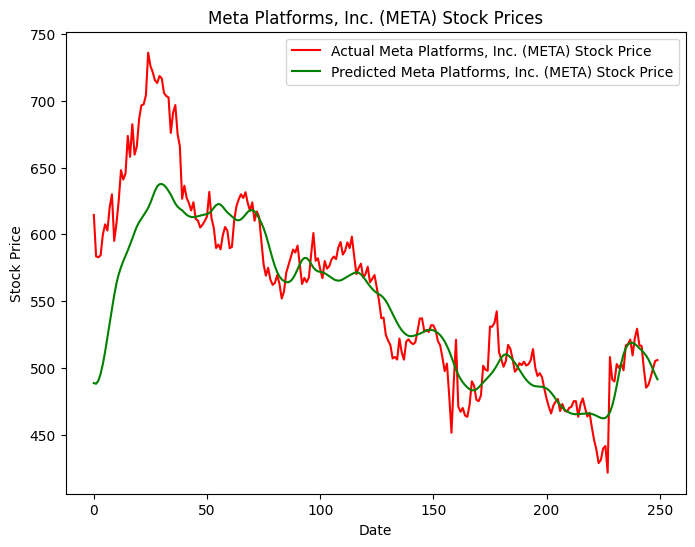

In [ ]:
#plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(testing_processed, color='red', label='Actual Meta Platforms, Inc. (META) Stock Price')
plt.plot(y_pred , color='green', label='Predicted Meta Platforms, Inc. (META) Stock Price')
plt.title('Meta Platforms, Inc. (META) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()